In [1]:
from manim import *
from christmas_fourier_classes import *
from PIL import Image
import jupyter_capture_output

video_scene = f" -v WARNING --disable_caching cf_long_Scene"
image_scene = f" -v WARNING --disable_caching -r {2*427},{2*240}  -s cf_long_Scene"

Jupyter Capture Output v0.0.11


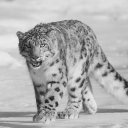

In [2]:
# reading the image
image_snow_leopard1 = Image.open('external_media/SnowLeopard1_128.jpg')

# convert image to greyscale
image_snow_leopard1_greyscale = image_snow_leopard1.convert('L')

# creating a numpy array from the greyscale picture (division of the greyscale values by 2 to fit the properties of the encoding)
image_snow_leopard1_greyscale_array = np.array(image_snow_leopard1_greyscale)


# returning an omega_xyc tupel for given image coordinates and greyscale
def get_omega_xyc(i_row, j_column, image_array):
    omega_x_encoded = j_column + 128                                                            # turns row number into the correct frequency by adding 128
    omega_y_encoded = 3*128 - i_row - 1                                                         # turns column number into its correspoding frequency
    omega_c_encoded = image_array[i_row, j_column] / 2 + 3*128                                  # calculates the greyscale value into its frequency
    return (omega_x_encoded, omega_y_encoded, omega_c_encoded)


# creating iterators with encoded values used by the animation
encoded_data_list = []
for i_row in range(128):
    for j_column in range(128):
        encoded_data_list.append(get_omega_xyc(i_row, j_column, image_snow_leopard1_greyscale_array))


# iterating through the image via spiral from outside to inside
encoded_data_list_spiral = []
track_list = []
i_row = 0
j_column = 0
row_start = 1
row_end = 128
column_start = 0
column_end = 128
while (column_start != column_end and row_start != row_end):
    while (j_column < column_end):
        encoded_data_list_spiral.append(get_omega_xyc(i_row, j_column, image_snow_leopard1_greyscale_array))
        track_list.append((i_row, j_column))
        j_column += 1
    j_column -= 1
    column_end -=1
    i_row += 1
    while (i_row < row_end):
        encoded_data_list_spiral.append(get_omega_xyc(i_row, j_column, image_snow_leopard1_greyscale_array))
        track_list.append((i_row, j_column))
        i_row += 1
    i_row -= 1
    row_end -=1
    j_column -= 1
    while (j_column >= column_start):
        encoded_data_list_spiral.append(get_omega_xyc(i_row, j_column, image_snow_leopard1_greyscale_array))
        track_list.append((i_row, j_column))
        j_column -= 1
    j_column += 1
    column_start +=1
    i_row -= 1
    while (i_row >= row_start):
        encoded_data_list_spiral.append(get_omega_xyc(i_row, j_column, image_snow_leopard1_greyscale_array))
        track_list.append((i_row, j_column))
        i_row -= 1
    i_row += 1
    row_start += 1
    j_column += 1


# LANGER SCHWANZ FÜR DIE LISTE DAMIT DER HS NICHT NACH 2 STUNDEN WEGEN 1 ITERELEMENTS RUMHEULT
if (main_color == BLACK):
    for i in range(100):
        encoded_data_list_spiral.append((191, 319, 4*128-1))#4*128-1 for white BG
else:
    for i in range(100):
        encoded_data_list_spiral.append((191, 319, 3*128))#3*128 for black BG


# shows the original 128x128 image
image_snow_leopard1_greyscale.save("external_media/SnowLeopard1_greyscale.jpg")
image_snow_leopard1_greyscale

In [3]:
%%manim -qh --fps 64 $video_scene


class cf_long_Scene(Scene):
    def construct(self):
        #self.camera.background_color = WHITE
        CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC)

        # starting signal
        init_signal_omega_xyc = encoded_data_list_spiral[0]

        # square with the transformed image
        image_box = FTransformedImage(position = np.array([3.75, 0.5, 0]), size = 4)
        self.add(image_box)

        # square with the untransformed signal 
        signal_box = IncomingSignal(position = (-3.25, 0.5, 0), height = 4, width = 5)
        self.add(signal_box)


        # updates an incoming signal to the next one
        def signal_updater(signal):
            # getting the next frequency
            next_signal_omega_xyc = next(signal.iterator)
            # using the next frequency to update the animation and add the pixel
            self.add(image_box.get_pixel(next_signal_omega_xyc))
            signal.pixel_arm.become(image_box.get_pixel_arm(next_signal_omega_xyc))
            signal.ft_signal.become(signal_box.get_ft_signal(next_signal_omega_xyc))
            signal.become(signal_box.get_signal(next_signal_omega_xyc)) 


        # turning the data list into an iterator and creating the first frequency tupel
        encoded_data_iter = iter(encoded_data_list_spiral)

        # setting up the signals using the methods of the boxes             
        init_signal = signal_box.get_signal(init_signal_omega_xyc)                                      # the initial untransformed signal wave
        init_signal.iterator = encoded_data_iter                                                        # the iterator of the omega_xyc frequencies
        init_signal.pixel = image_box.get_pixel(init_signal_omega_xyc)                                  # the first pixel of the recreated image
        init_signal.pixel_arm = image_box.get_pixel_arm(init_signal_omega_xyc)                          # the descriptor on both axes of the first pixel
        init_signal.ft_signal = signal_box.get_ft_signal(init_signal_omega_xyc)                         # the fourier-transformed signal wave
        

        self.add(init_signal, init_signal.pixel, init_signal.pixel_arm, init_signal.ft_signal)
        self.wait(4)
        init_signal.add_updater(signal_updater)
        t_tracker = ValueTracker(0)
        self.play(t_tracker.animate.set_value(1), rate_func = linear, run_time = 128*2)#128*2
        self.wait(5)

Manim Community v0.19.0